In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
dftrain = pd.read_csv("train.csv")
dftest = pd.read_csv("test.csv")

In [7]:
dftrain.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
dftrain.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [9]:
dftest.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

<AxesSubplot:>

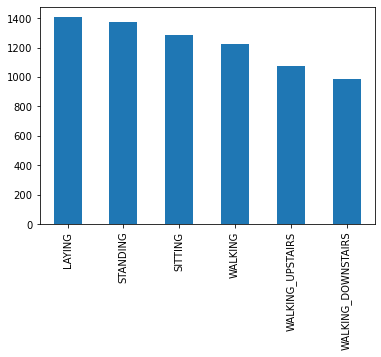

In [99]:
dftrain.Activity.value_counts().plot.bar()

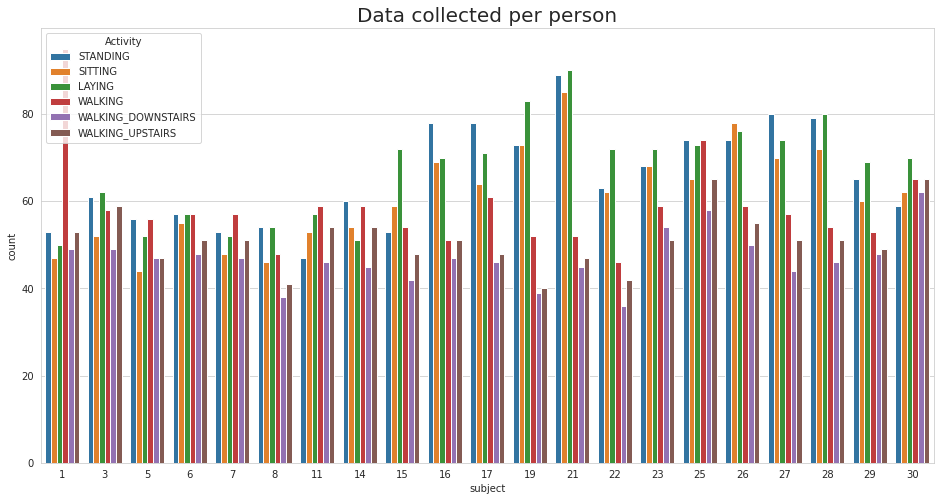

In [100]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'
plt.figure(figsize=(16,8))
plt.title('Data collected per person', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = dftrain)
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [11]:
x = dftrain.drop('Activity',inplace=False, axis = 1)
y = dftrain['Activity']

In [49]:
y = y.map({'STANDING': 0, 'SITTING': 1, 'LAYING': 2, 'WALKING':3,'WALKING_DOWNSTAIRS':4, 'WALKING_UPSTAIRS':5})

In [50]:
x.shape

(7352, 562)

In [51]:
y.shape

(7352,)

In [52]:
y.head

<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
       ..
7347    5
7348    5
7349    5
7350    5
7351    5
Name: Activity, Length: 7352, dtype: int64>

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.25,random_state = 10)

In [55]:
x_train.head

<bound method NDFrame.head of       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
3210           0.124867          -0.005935          -0.106115   
852            0.274719          -0.021780          -0.097792   
5331           0.276786          -0.011318          -0.108497   
6655           0.276173          -0.012915          -0.101109   
4652           0.231238          -0.021534          -0.098284   
...                 ...                ...                ...   
3441           0.277831          -0.016453          -0.109082   
1344           0.265850          -0.035555          -0.156516   
4623           0.337784          -0.011351          -0.122571   
7293           0.270378          -0.026488          -0.061389   
1289           0.107729          -0.000998          -0.024357   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
3210          0.104896         -0.132121         -0.003362          0.043400   
852          -0.981171       

In [56]:
x_test.shape

(1838, 562)

In [57]:
y_train.shape

(5514,)

In [58]:
y_test.shape

(1838,)

In [59]:
y_train.head

<bound method NDFrame.head of 3210    4
852     0
5331    1
6655    0
4652    3
       ..
3441    0
1344    1
4623    2
7293    3
1289    4
Name: Activity, Length: 5514, dtype: int64>

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc = StandardScaler().fit(x_train)

In [62]:
X_train_std = sc.transform(x_train)

X_test_std = sc.transform(x_test)

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score

### linear

In [64]:
params = {'C':(0.001,0.005,0.01,0.05, 0.1, 0.5, 1, 5, 10, 50,100,500,1000)}
clf_svm_p4=svm.SVC(kernel='linear')
svm_grid_lin=GridSearchCV(clf_svm_p4,params,n_jobs=-1,cv=10,verbose=1,scoring='accuracy')
svm_grid_lin.fit(X_train_std,y_train)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000)},
             scoring='accuracy', verbose=1)

In [65]:
linsvm_clf=svm_grid_lin.best_estimator_
accuracy_score(y_test,linsvm_clf.predict(X_test_std))

0.9793253536452666

### grid

In [83]:
params = {'C':(0.01,0.05, 0.1, 0.5, 1, 5, 10, 50), 
          'gamma':(0.001, 0.01, 0.1, 0.5, 1)}
clf_svm_r = svm.SVC(kernel='rbf')
svm_grid_rad = GridSearchCV(clf_svm_r, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy')
svm_grid_rad.fit(X_train_std, y_train)


Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': (0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50),
                         'gamma': (0.001, 0.01, 0.1, 0.5, 1)},
             scoring='accuracy', verbose=1)

In [84]:
radsvm_clf = svm_grid_rad.best_estimator_
accuracy_score(y_test, radsvm_clf.predict(X_test_std))

0.985310119695321

### polynamial

In [91]:
clf_svm_p2=svm.SVC(kernel='poly',degree=2,C=0.1)
clf_svm_p2.fit(X_train_std,y_train)

SVC(C=0.1, degree=2, kernel='poly')

In [92]:
y_train_pred=clf_svm_p2.predict(X_train_std)
y_test_pred=clf_svm_p2.predict(X_test_std)
accuracy_score(y_test,y_test_pred)

0.911860718171926

### KNN

In [71]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [72]:
mse = []
r2 = []
for i in range(1,10):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse_i = mean_squared_error(y_test,y_pred)
    mse.append(mse_i)
    r2_i = r2_score(y_test,y_pred)
    r2.append(r2_i)

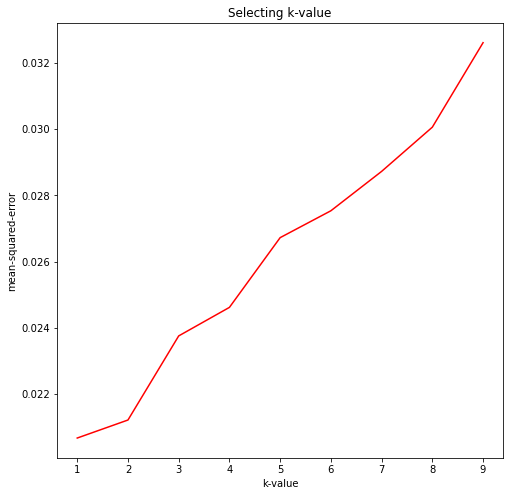

In [73]:
plt.figure(figsize = (8,8))
plt.plot(np.arange(1,10),mse,'r')
plt.xlabel('k-value')
plt.ylabel('mean-squared-error')
plt.title('Selecting k-value')
plt.show()

In [81]:
model = KNeighborsRegressor(n_neighbors=1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [82]:
r2_score(y_test,y_pred)

0.9927854180411445

### for testing data

In [93]:
dftest.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [94]:
dftrain.isnull().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64